## Project 2: US Flights EDA

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import sys
print(sys.version)
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import pyarrow as pyro
print(pyro.__version__)
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Display Options
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format

cols = ['FlightDate','Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'DepTime', 'DepDelay', 'ArrTime', 'AirTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'OriginCityName', 'OriginState', 'DestCityName', 'DestState', 'DepDel15',
       'DepartureDelayGroups',  'ArrDelay', 'ArrDel15','ArrivalDelayGroups', 'DivAirportLandings', 'ArrTimeBlk', 'DepTimeBlk']

# Datasets
airlines = pd.read_csv("../Airlines.csv")
df = pd.read_csv('../Combined_Flights_2021.csv', parse_dates=['FlightDate'], usecols=cols)
sub_2021_df = df # used interchangeably with the 'df' throughout this notebook


3.8.16 (default, Mar  1 2023, 21:19:10) 
[Clang 14.0.6 ]
1.5.3
1.23.5
10.0.1


In [3]:
# Merge with airline dataset in order to get the major airline
df = pd.merge(df, airlines, left_on='Marketing_Airline_Network', right_on='Code')
df.Airline.unique()

array(['SkyWest Airlines Inc.', 'Mesa Airlines Inc.', 'Republic Airlines',
       'Envoy Air', 'Comair Inc.', 'American Airlines Inc.',
       'Capital Cargo International', 'Delta Air Lines Inc.',
       'Endeavor Air Inc.', 'United Air Lines Inc.',
       'Commutair Aka Champlain Enterprises, Inc.',
       'GoJet Airlines, LLC d/b/a United Express',
       'Air Wisconsin Airlines Corp', 'Horizon Air',
       'Alaska Airlines Inc.', 'Southwest Airlines Co.',
       'Spirit Air Lines', 'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Empire Airlines Inc.',
       'JetBlue Airways'], dtype=object)

In [4]:
# Check Year(s)
df.Year.unique()

array([2021])

In [5]:
#Columns 1-3
df.iloc[:, 0:30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311871 entries, 0 to 6311870
Data columns (total 30 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   FlightDate                 datetime64[ns]
 1   Airline                    object        
 2   Origin                     object        
 3   Dest                       object        
 4   Cancelled                  bool          
 5   Diverted                   bool          
 6   DepTime                    float64       
 7   DepDelay                   float64       
 8   ArrTime                    float64       
 9   AirTime                    float64       
 10  ActualElapsedTime          float64       
 11  Distance                   float64       
 12  Year                       int64         
 13  Quarter                    int64         
 14  Month                      int64         
 15  DayofMonth                 int64         
 16  DayOfWeek                  int64    

### Data Clean up


In [6]:
# reorder columns
cols = df.columns.to_list()
cols = cols[0:1] + cols[-1:] +cols[1:-1]
#cols
df = df[cols]

In [7]:
# reorder columns: FlightDate, Airline
cols = df.columns.to_list()
cols = cols[0:1] + cols[-1:] +cols[1:-1]
df = df[cols]

# rename columns
df = df.rename(columns={'Description':'MajorAirline'})

In [9]:
# Type cast ArrDel15 to Boolean
df['ArrDel15'] = df['ArrDel15'].astype('bool')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311871 entries, 0 to 6311870
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   FlightDate                 datetime64[ns]
 1   Code                       object        
 2   MajorAirline               object        
 3   Airline                    object        
 4   Origin                     object        
 5   Dest                       object        
 6   Cancelled                  bool          
 7   Diverted                   bool          
 8   DepTime                    float64       
 9   DepDelay                   float64       
 10  ArrTime                    float64       
 11  AirTime                    float64       
 12  ActualElapsedTime          float64       
 13  Distance                   float64       
 14  Year                       int64         
 15  Quarter                    int64         
 16  Month                      int64    

In [11]:
# Create a timeblock 
df['time_block'] = df['DepTimeBlk'].str[:4]
df['time_block'] = df['time_block'].astype(str)
df['time_block'].unique()

array(['0700', '0900', '1300', '1600', '1800', '1200', '2000', '1000',
       '1500', '0001', '0600', '1700', '1400', '0800', '1900', '1100',
       '2100', '2200', '2300'], dtype=object)

### Data Subsets


In [12]:
# Filters
operated_flights = df['Cancelled'] == False
cancelled_flights = df['Cancelled'] == True
top3_airlines = df['MajorAirline'].isin(['American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.'])


### Initial Exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311871 entries, 0 to 6311870
Data columns (total 33 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   FlightDate                 datetime64[ns]
 1   Code                       object        
 2   MajorAirline               object        
 3   Airline                    object        
 4   Origin                     object        
 5   Dest                       object        
 6   Cancelled                  bool          
 7   Diverted                   bool          
 8   DepTime                    float64       
 9   DepDelay                   float64       
 10  ArrTime                    float64       
 11  AirTime                    float64       
 12  ActualElapsedTime          float64       
 13  Distance                   float64       
 14  Year                       int64         
 15  Quarter                    int64         
 16  Month                      int64    

In [14]:
df.MajorAirline.unique()

array(['American Airlines Inc.', 'Delta Air Lines Inc.',
       'United Air Lines Inc.', 'Alaska Airlines Inc.',
       'Southwest Airlines Co.', 'Spirit Air Lines',
       'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'JetBlue Airways'], dtype=object)

In [15]:
df.shape

(6311871, 33)

In [16]:
df[operated_flights]

,FlightDate,Code,MajorAirline,Airline,Origin,Dest,Cancelled,Diverted,DepTime,DepDelay,...,DestState,DepDel15,DepartureDelayGroups,DepTimeBlk,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DivAirportLandings,time_block
0,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,SGU,PHX,False,False,714.00,-10.00,...,AZ,0.00,-1.00,0700-0759,-25.00,False,-2.00,0800-0859,0.00,0700
1,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,PHX,SGU,False,False,917.00,-5.00,...,UT,0.00,-1.00,0900-0959,-9.00,False,-1.00,1000-1059,0.00,0900
2,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,MHT,ORD,False,False,"1,321.00",-9.00,...,IL,0.00,-1.00,1300-1359,-29.00,False,-2.00,1500-1559,0.00,1300
3,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,DFW,TRI,False,False,"1,636.00",-9.00,...,TN,0.00,-1.00,1600-1659,-8.00,False,-1.00,2000-2059,0.00,1600
4,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,PHX,BFL,False,False,"1,838.00",-6.00,...,CA,0.00,-1.00,1800-1859,-22.00,False,-2.00,1900-1959,0.00,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311771,2021-06-29,B6,JetBlue Airways,JetBlue Airways,JFK,LAS,False,False,"1,926.00",27.00,...,NV,1.00,1.00,1800-1859,1.00,False,0.00,2100-2159,0.00,1800
6311772,2021-06-29,B6,JetBlue Airways,JetBlue Airways,LAS,JFK,False,False,"2,342.00",43.00,...,NY,1.00,2.00,2200-2259,35.00,True,2.00,0700-0759,0.00,2200
6311773,2021-06-30,B6,JetBlue Airways,JetBlue Airways,JFK,LAS,False,False,"1,911.00",12.00,...,NV,0.00,0.00,1800-1859,6.00,False,0.00,2100-2159,0.00,1800
6311774,2021-06-30,B6,JetBlue Airways,JetBlue Airways,LAS,JFK,False,False,38.00,99.00,...,NY,1.00,6.00,2200-2259,77.00,True,5.00,0700-0759,0.00,2200


In [17]:
df[operated_flights]


,FlightDate,Code,MajorAirline,Airline,Origin,Dest,Cancelled,Diverted,DepTime,DepDelay,...,DestState,DepDel15,DepartureDelayGroups,DepTimeBlk,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DivAirportLandings,time_block
0,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,SGU,PHX,False,False,714.00,-10.00,...,AZ,0.00,-1.00,0700-0759,-25.00,False,-2.00,0800-0859,0.00,0700
1,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,PHX,SGU,False,False,917.00,-5.00,...,UT,0.00,-1.00,0900-0959,-9.00,False,-1.00,1000-1059,0.00,0900
2,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,MHT,ORD,False,False,"1,321.00",-9.00,...,IL,0.00,-1.00,1300-1359,-29.00,False,-2.00,1500-1559,0.00,1300
3,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,DFW,TRI,False,False,"1,636.00",-9.00,...,TN,0.00,-1.00,1600-1659,-8.00,False,-1.00,2000-2059,0.00,1600
4,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,PHX,BFL,False,False,"1,838.00",-6.00,...,CA,0.00,-1.00,1800-1859,-22.00,False,-2.00,1900-1959,0.00,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311771,2021-06-29,B6,JetBlue Airways,JetBlue Airways,JFK,LAS,False,False,"1,926.00",27.00,...,NV,1.00,1.00,1800-1859,1.00,False,0.00,2100-2159,0.00,1800
6311772,2021-06-29,B6,JetBlue Airways,JetBlue Airways,LAS,JFK,False,False,"2,342.00",43.00,...,NY,1.00,2.00,2200-2259,35.00,True,2.00,0700-0759,0.00,2200
6311773,2021-06-30,B6,JetBlue Airways,JetBlue Airways,JFK,LAS,False,False,"1,911.00",12.00,...,NV,0.00,0.00,1800-1859,6.00,False,0.00,2100-2159,0.00,1800
6311774,2021-06-30,B6,JetBlue Airways,JetBlue Airways,LAS,JFK,False,False,38.00,99.00,...,NY,1.00,6.00,2200-2259,77.00,True,5.00,0700-0759,0.00,2200


In [18]:
# Operated Flight Volume -  Heatmap - Month, DayofMonth
df_operated_mdm = df[operated_flights].groupby(['Month', 'DayofMonth'])['MajorAirline'].agg('count').unstack(level=0)

In [19]:
# Operated Flight Volume - Percentage Heatmap - Month, DayOfWeek
df_operated_mdw = df[operated_flights].groupby(['Month', 'DayOfWeek'])['MajorAirline'].agg(['count']).unstack(level=0)
df_operated_mdw.head(1)

count                                                          \
Month         1      2      3      4      5      6      7      8      9    
DayOfWeek                                                                  
1          52133  47946  76829  66484  87297  77355  80220  97647  77638   

                                 
Month         10      11     12  
DayOfWeek                        
1          78070  100127  76269

In [20]:
# Operated Flight Volume - Percentage Heatmap - Month, DayOfWeek
df_operated = df[operated_flights].groupby(['MajorAirline'])['FlightDate'].agg(['count']).unstack(level=0)
airline_vol = df_operated.sort_values(ascending=False)
airline_vol

       MajorAirline          
count  American Airlines Inc.    1640919
       Delta Air Lines Inc.      1349456
       United Air Lines Inc.     1123137
       Southwest Airlines Co.    1041135
       Alaska Airlines Inc.       353448
       JetBlue Airways            199403
       Spirit Air Lines           185700
       Frontier Airlines Inc.     135213
       Allegiant Air              112052
       Hawaiian Airlines Inc.      60390
dtype: int64

In [21]:
# Operated Flight Volume -  Heatmap - Month, DayofMonth
df_delayed_by_time_block = df[operated_flights].groupby(['Month', 'time_block'])['DepDel15'].agg('mean').unstack(level=0)
df_delayed_by_time_block

Month,1,2,3,4,5,6,7,8,9,10,11,12
time_block,,,,,,,,,,,,
0001,0.05,0.09,0.05,0.07,0.08,0.12,0.13,0.11,0.07,0.08,0.09,0.14
0600,0.05,0.07,0.05,0.05,0.06,0.09,0.09,0.09,0.06,0.08,0.08,0.10
0700,0.06,0.08,0.06,0.06,0.07,0.11,0.11,0.11,0.07,0.10,0.09,0.12
0800,0.06,0.09,0.06,0.06,0.08,0.13,0.14,0.14,0.08,0.12,0.10,0.14
0900,0.06,0.10,0.08,0.08,0.09,0.16,0.16,0.15,0.10,0.14,0.12,0.17
1000,0.08,0.12,0.09,0.09,0.11,0.17,0.18,0.17,0.11,0.16,0.13,0.19
1100,0.08,0.13,0.09,0.10,0.11,0.19,0.19,0.19,0.12,0.17,0.14,0.21
1200,0.09,0.14,0.10,0.11,0.13,0.22,0.22,0.20,0.13,0.18,0.15,0.22
1300,0.09,0.13,0.11,0.12,0.14,0.24,0.24,0.23,0.15,0.20,0.17,0.25


In [22]:
# Top 10 Major Airline by Flight Departures [2019-2021]
top_5_alines = pd.DataFrame(df[df['Cancelled']==False])
top_5_alines = pd.DataFrame(df['MajorAirline'].value_counts()).head(10).T

top_5_alines = top_5_alines.rename(index={'MajorAirline': 'Flight Volume'})
top_5_alines.style.format('{:,.0f}')

# create a style dictionary with the CSS rules for wrapping text
style_dict = [
    {'selector': 'th', 
     'props': [('max-width', '70px'), 
               ('word-wrap', 'word'),
               #('overflow', 'hidden'),
               ('text-overflow', 'ellipsis')]
    }
]

top_5_alines = top_5_alines.applymap('{:,.0f}'.format)

# create the styled dataframe with wrapped column headers
top_5_alines.style.set_table_styles(style_dict)

,American Airlines Inc.,Delta Air Lines Inc.,United Air Lines Inc.,Southwest Airlines Co.,Alaska Airlines Inc.,JetBlue Airways,Spirit Air Lines,Frontier Airlines Inc.,Allegiant Air,Hawaiian Airlines Inc.
Flight Volume,"1,674,371","1,357,322","1,148,340","1,064,640","359,458","202,702","191,361","137,142","115,881","60,654"


#### Top 10 Busy Airports

In [23]:
# Top 10 Busiest Airports 
top_10_busy_aport_by_dep = pd.DataFrame(df[df['Cancelled']==False])
top_10_busy_aport_by_dep = pd.DataFrame(df['Origin'].value_counts().head(10)).T
top_10_busy_aport_by_dep = top_10_busy_aport_by_dep.rename(index={'Origin': 'Flight Volume'})
top_10_busy_aport_by_dep = top_10_busy_aport_by_dep.style.format('{:,.0f}')
top_10_busy_aport_by_dep

,ATL,ORD,DFW,DEN,CLT,LAX,SEA,PHX,IAH,LAS
Flight Volume,"313,287","285,607","280,418","268,140","226,221","174,318","168,025","160,640","153,635","141,412"


In [24]:
# Top 10 list of busy airports
top_10_airports = top_10_busy_aport_by_dep.columns.to_list()
top_10_airports

['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'SEA', 'PHX', 'IAH', 'LAS']

In [25]:
# Filter dataframe for the Top 10 busy airports
top_10_busy_airport_filter = df[operated_flights]['Origin'].isin(top_10_airports)
df[operated_flights][top_10_busy_airport_filter]['Origin'].unique()

array(['PHX', 'DFW', 'ORD', 'LAX', 'DEN', 'IAH', 'ATL', 'CLT', 'LAS',
       'SEA'], dtype=object)

In [26]:
top_10_busiest_airports = df[operated_flights][top_10_busy_airport_filter]
top_10_busiest_airports.head()

,FlightDate,Code,MajorAirline,Airline,Origin,Dest,Cancelled,Diverted,DepTime,DepDelay,...,DestState,DepDel15,DepartureDelayGroups,DepTimeBlk,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DivAirportLandings,time_block
1,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,PHX,SGU,False,False,917.00,-5.00,...,UT,0.00,-1.00,0900-0959,-9.00,False,-1.00,1000-1059,0.00,0900
3,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,DFW,TRI,False,False,"1,636.00",-9.00,...,TN,0.00,-1.00,1600-1659,-8.00,False,-1.00,2000-2059,0.00,1600
4,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,PHX,BFL,False,False,"1,838.00",-6.00,...,CA,0.00,-1.00,1800-1859,-22.00,False,-2.00,1900-1959,0.00,1800
5,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,ORD,BNA,False,False,"1,648.00",-2.00,...,TN,0.00,-1.00,1600-1659,-26.00,False,-2.00,1800-1859,0.00,1600
7,2021-03-03,AA,American Airlines Inc.,SkyWest Airlines Inc.,DFW,YUM,False,False,"1,242.00",-3.00,...,AZ,0.00,-1.00,1200-1259,-4.00,False,-1.00,1400-1459,0.00,1200


In [27]:
# top 3 airlines by airport
top3 = ['American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.', 'Total']

pivot1 = df[operated_flights].pivot_table(columns='MajorAirline', index='Origin', aggfunc='count', margins=True, margins_name='Total', dropna=False)
pivot1 = pivot1['FlightDate']
sorted_pivot= pivot1.sort_values(by='Total', ascending=False).head(15)
sorted_pivot.style.format('{:,.0f}')

sorted_pivot[top3].head(10)

MajorAirline,American Airlines Inc.,Delta Air Lines Inc.,United Air Lines Inc.,Total
Origin,,,,
Total,"1,640,919.00","1,349,456.00","1,123,137.00",6200853
ATL,"12,351.00","246,399.00","6,057.00",311238
ORD,"112,188.00","12,188.00","136,074.00",279717
DFW,"242,784.00","9,889.00","7,674.00",271438
DEN,"9,962.00","11,487.00","141,561.00",262301
CLT,"205,427.00","8,576.00","4,739.00",223538
LAX,"37,862.00","43,770.00","28,274.00",172141
SEA,"6,487.00","42,620.00","6,679.00",165626
PHX,"75,465.00","11,467.00","8,273.00",158742


In [28]:
#1C table
# define top3 and pivot
top3 = ['American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.']
pivot1 = df[operated_flights].pivot_table(columns='MajorAirline', index='Origin', aggfunc='count', margins=True, margins_name='Total', dropna=False)
pivot1 = pivot1['FlightDate']

# sort and format pivot
sorted_pivot = pivot1.sort_values(by='Total', ascending=False).head(15)
sorted_pivot = sorted_pivot.iloc[1:,:-1]
sorted_pivot = sorted_pivot[top3].head(10).transpose().style.format('{:,.0f}')

# apply conditional formatting to the values of the pivot table
sorted_pivot = sorted_pivot.background_gradient(subset=sorted_pivot.columns, cmap='Blues')
sorted_pivot


Origin,ATL,ORD,DFW,DEN,CLT,LAX,SEA,PHX,IAH,LAS
MajorAirline,,,,,,,,,,
American Airlines Inc.,"12,351","112,188","242,784","9,962","205,427","37,862","6,487","75,465","8,806","12,333"
Delta Air Lines Inc.,"246,399","12,188","9,889","11,487","8,576","43,770","42,620","11,467","7,537","13,749"
United Air Lines Inc.,"6,057","136,074","7,674","141,561","4,739","28,274","6,679","8,273","120,265","9,910"


In [30]:
airline_vol.reset_index()

       MajorAirline          
count  American Airlines Inc.    1640919
       Delta Air Lines Inc.      1349456
       United Air Lines Inc.     1123137
       Southwest Airlines Co.    1041135
       Alaska Airlines Inc.       353448
       JetBlue Airways            199403
       Spirit Air Lines           185700
       Frontier Airlines Inc.     135213
       Allegiant Air              112052
       Hawaiian Airlines Inc.      60390
dtype: int64

In [31]:
# top 10 busiest airport 
top_10_busiest_airports.Origin.unique()

array(['PHX', 'DFW', 'ORD', 'LAX', 'DEN', 'IAH', 'ATL', 'CLT', 'LAS',
       'SEA'], dtype=object)

In [32]:
# Delayed Flights - Percentage Heatmap - Month
df_delay_pct_mdm = df[operated_flights].groupby(['Month'])['DepDel15'].agg(['mean']).unstack(level=0)
df_delay_mo = df_delay_pct_mdm.reset_index()
df_delay_mo['Flight Delay %'] = df_delay_mo.iloc[:,2] * 100
df_delay_mo = df_delay_mo[['Month', 'Flight Delay %']]

#Transpose
df_delay_mo = df_delay_mo.transpose()
df_styled = df_delay_mo.iloc[1:,:]
df_styled.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# create a copy of the dataframe to add conditional formatting
df_styled = df_styled.style

# add conditional formatting to highlight values above a threshold
df_styled.background_gradient(cmap='Reds', vmin=8.53, vmax=25.16).format('{:,.2f}')

df_styled

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Flight Delay %,8.53,11.88,10.04,10.59,13.56,24.06,25.16,22.97,14.40,18.95,15.95,22.67


In [36]:
#Delays at Top 10 Busiest Airports
df_delays_busy_airports = top_10_busiest_airports.groupby(['Month', 'Origin'])['DepDel15'].agg(['mean']).unstack(level=0)
df_delays_busy_airports

mean                                                       
Month    1    2    3    4    5    6    7    8    9    10   11   12
Origin                                                            
ATL    0.08 0.09 0.09 0.11 0.14 0.18 0.23 0.19 0.12 0.15 0.12 0.18
CLT    0.08 0.10 0.08 0.07 0.10 0.20 0.21 0.21 0.11 0.13 0.11 0.13
DEN    0.08 0.18 0.14 0.14 0.21 0.33 0.37 0.32 0.21 0.25 0.20 0.36
DFW    0.13 0.18 0.13 0.16 0.22 0.33 0.34 0.28 0.17 0.22 0.17 0.20
IAH    0.08 0.11 0.09 0.10 0.15 0.27 0.29 0.25 0.16 0.19 0.15 0.21
LAS    0.07 0.09 0.11 0.12 0.18 0.35 0.37 0.30 0.22 0.30 0.21 0.35
LAX    0.07 0.08 0.09 0.09 0.13 0.22 0.25 0.21 0.14 0.22 0.16 0.29
ORD    0.11 0.15 0.09 0.08 0.09 0.25 0.24 0.27 0.15 0.21 0.16 0.19
PHX    0.07 0.09 0.11 0.10 0.16 0.29 0.31 0.26 0.17 0.28 0.22 0.27
SEA    0.06 0.12 0.09 0.09 0.09 0.19 0.16 0.19 0.13 0.15 0.16 0.27

In [37]:
# Delayed Flights - Percentage Heatmap - Month, DayofMonth
df_delay_pct_mdm = df[operated_flights].groupby(['Month', 'DayofMonth'])['DepDel15'].agg(['mean']).unstack(level=0)
df_delay_pct_mdm.head()

mean                                                       
Month        1    2    3    4    5    6    7    8    9    10   11   12
DayofMonth                                                            
1          0.13 0.08 0.08 0.14 0.12 0.11 0.32 0.32 0.17 0.21 0.23 0.12
2          0.16 0.06 0.05 0.09 0.13 0.12 0.35 0.30 0.18 0.16 0.13 0.14
3          0.20 0.06 0.05 0.09 0.17 0.19 0.29 0.27 0.21 0.19 0.15 0.13
4          0.16 0.08 0.06 0.07 0.18 0.19 0.16 0.20 0.13 0.14 0.18 0.12
5          0.07 0.07 0.06 0.08 0.14 0.19 0.20 0.18 0.11 0.12 0.19 0.17

In [38]:
# Delayed Flights - Percentage Heatmap - Month, DayofWeek
df_delay_pct_mdw = df[operated_flights].groupby(['Month', 'DayOfWeek'])['DepDel15'].agg(['mean']).unstack(level=0)
df_delay_pct_mdw

mean                                                       
Month       1    2    3    4    5    6    7    8    9    10   11   12
DayOfWeek                                                            
1         0.08 0.12 0.10 0.10 0.15 0.28 0.26 0.22 0.14 0.21 0.18 0.25
2         0.06 0.09 0.07 0.08 0.16 0.22 0.22 0.20 0.12 0.16 0.13 0.24
3         0.07 0.08 0.09 0.09 0.11 0.20 0.23 0.23 0.13 0.14 0.13 0.21
4         0.05 0.13 0.12 0.10 0.12 0.22 0.26 0.24 0.17 0.19 0.16 0.23
5         0.09 0.11 0.10 0.12 0.14 0.24 0.27 0.24 0.18 0.21 0.17 0.20
6         0.09 0.13 0.12 0.12 0.12 0.27 0.26 0.23 0.12 0.18 0.17 0.23
7         0.13 0.15 0.11 0.12 0.14 0.27 0.25 0.25 0.15 0.22 0.19 0.24

In [39]:
# Delayed Flights - Percentage Heatmap - Month, DayofMonth
#df_delay_top3airline_per_month = 

df_delay_top3_airline_per_month = df[operated_flights & top3_airlines].groupby(['MajorAirline', 'Month'])['DepDel15'].agg(['mean']).reset_index()
#df_delay_top3_airline_per_month = df[operated_flights].groupby(['MajorAirline', 'Month'])['DepDel15'].agg(['mean']).reset_index()
df_delay_top3_airline_per_month.head()
#df_delay_pct_mdm.head()

,MajorAirline,Month,mean
0,American Airlines Inc.,1,0.10
1,American Airlines Inc.,2,0.13
2,American Airlines Inc.,3,0.10
3,American Airlines Inc.,4,0.10
4,American Airlines Inc.,5,0.13


In [40]:
# Delay by Month Overall

# Delayed Flights - Percentage Heatmap - Month, DayofMonth
#df_delay_top3airline_per_month = 

df_delay_top3_airline_per_month = df[operated_flights & top3_airlines].groupby(['MajorAirline', 'Month'])['DepDel15'].agg(['mean']).reset_index()
#df_delay_top3_airline_per_month = df[operated_flights].groupby(['MajorAirline', 'Month'])['DepDel15'].agg(['mean']).reset_index()
df_delay_top3_airline_per_month.head()
#df_delay_pct_mdm.head()

,MajorAirline,Month,mean
0,American Airlines Inc.,1,0.10
1,American Airlines Inc.,2,0.13
2,American Airlines Inc.,3,0.10
3,American Airlines Inc.,4,0.10
4,American Airlines Inc.,5,0.13


In [41]:
#2C Top 10 Busiest Airports - Average Delays

# Calculate mean departure delay for each major airline
df_delay_all_airline_per_month = df[operated_flights].groupby(['MajorAirline'])['DepDel15'].mean().reset_index()

# Sort airlines by increasing mean delay and select only relevant columns
df_delay_all_airline_per_month = df_delay_all_airline_per_month.sort_values(by='DepDel15').reset_index(drop=True)[['MajorAirline', 'DepDel15']]

# Convert delay to percentage and rename column
df_delay_all_airline_per_month['DepDel15'] = df_delay_all_airline_per_month['DepDel15'] * 100
df_delay_all_airline_per_month = df_delay_all_airline_per_month.rename(columns={'DepDel15': '2021 Avg Delay %'})

# Sort airlines by increasing average delay
df_delay_all_airline_per_month = df_delay_all_airline_per_month.sort_values(by=['2021 Avg Delay %'])
df_delay_all_airline_per_month.index += 1

# Output the resulting dataframe
df_delay_all_airline_per_month


,MajorAirline,2021 Avg Delay %
1,Hawaiian Airlines Inc.,8.80
2,Delta Air Lines Inc.,10.99
3,Alaska Airlines Inc.,13.24
4,American Airlines Inc.,15.93
5,United Air Lines Inc.,16.26
6,Spirit Air Lines,20.25
7,Frontier Airlines Inc.,21.81
8,JetBlue Airways,26.23
9,Allegiant Air,26.47
10,Southwest Airlines Co.,26.86


In [43]:
#2C - Table used in the Appendix 
# Delayed Airports
df_delay_airport_per_month = df[operated_flights].groupby(['Origin'])['DepDel15'].agg(['mean']).reset_index()
df_delay_airport_per_month.sort_values('mean', ascending=True).reset_index()[['Origin', 'mean']]
df_delay_airport_per_month = df_delay_airport_per_month.sort_values(by=['mean'], ascending=False)
df_delay_airport_per_month['mean'] = df_delay_airport_per_month['mean'] * 100
df_delay_airport_per_month = df_delay_airport_per_month.rename(columns={'mean': '2021 Avg Delay %'})
df_delay_airport_per_month = df_delay_airport_per_month.reset_index(drop=True)
df_delay_airport_per_month.head(10)


,Origin,2021 Avg Delay %
0,PPG,100.00
1,BIH,57.14
2,ADK,47.92
3,DAL,36.31
4,BQN,34.95
5,LCK,33.16
6,BRW,33.14
7,OGD,32.32
8,BLV,32.15
9,ILG,31.90


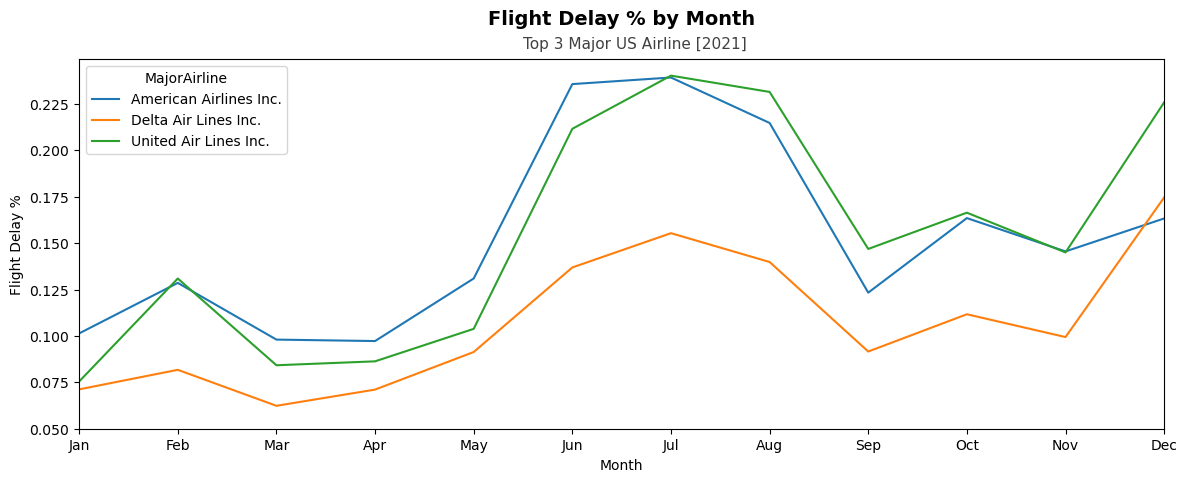

In [44]:
#2C - Percentage Delays Per Month By Top 3 Airline
fig, ax = plt.subplots()

#Set Title
ax.set_title('Flight Delay % by Month', 
             pad=25, 
             fontweight='bold', 
             fontsize=14
             )

sns.lineplot(data=df_delay_top3_airline_per_month, 
             x='Month', 
             y='mean', 
             hue='MajorAirline'
             )

ax.text(x=5.5, y=0.255, s='Top 3 Major US Airline [2021]', fontsize=11, alpha=0.75)

# Set x-axis limits to show all 12 months
ax.set_xlim(1, 12)

# Set tick positions and labels for all 12 months
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set y-axis lower limit to 0.05
ax.set_ylim(0.05, None)

ax.set_xlabel("Month")
ax.set_ylabel("Flight Delay %")

#ax.set_yscale()
fig.set_figwidth(14)

In [45]:

### top 3 Major US Airline

a = df_delay_airport_per_month[df_delay_airport_per_month['Origin'].isin(top_10_airports)]
a = a.set_index('Origin')
a.reset_index()

,Origin,2021 Avg Delay %
0,DEN,24.30
1,LAS,23.71
2,DFW,21.49
3,PHX,20.21
4,IAH,18.01
5,ORD,17.61
6,LAX,17.36
7,SEA,14.41
8,ATL,14.30
9,CLT,13.03


Text(50.722222222222214, 0.5, 'Airport')

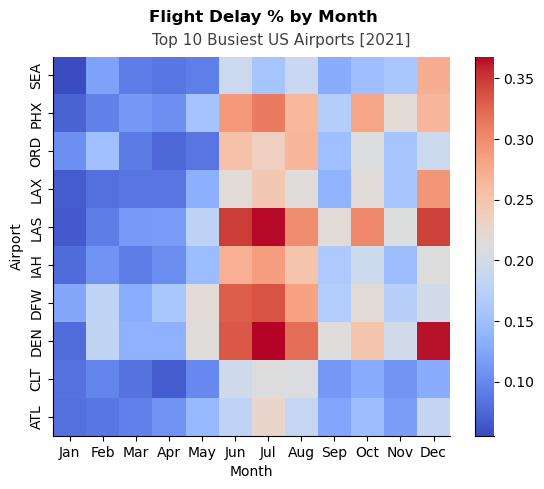

In [46]:
#2D - Top 1- Busiest Airports: Flight Delay % by Month"
hm0 = sns.heatmap(df_delays_busy_airports, 
                      xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                      yticklabels='auto', cmap='coolwarm'
                      )
hm0.invert_yaxis()
hm0.set_title("Flight Delay % by Month", pad=25, fontweight='bold', fontsize=12, x=0.53)
hm0.text(x=3, y=10.3, s='Top 10 Busiest US Airports [2021]', fontsize=11, alpha=0.75)
sns.despine()
plt.subplots_adjust(top=0.9)
hm0.set_xlabel("Month")
hm0.set_ylabel("Airport")


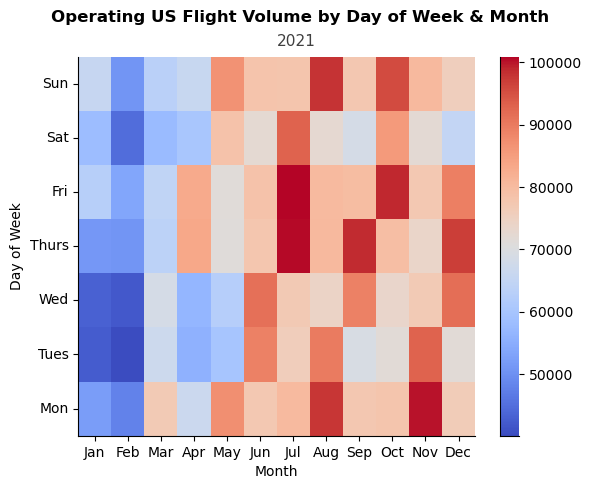

In [48]:
#1D - Operating Flight Volume by Month & Day of Week
# heat map - operated flights volumne by month & day of week
hm2 = sns.heatmap(df_operated_mdw, 
                      cmap='coolwarm', 
                      xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                      yticklabels=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
                      )
hm2.invert_yaxis()
hm2.set_title("Operating US Flight Volume by Day of Week & Month", pad=25, fontweight='bold', fontsize=12, x=0.56)
hm2.text(x=6, y=7.2, s='2021', fontsize=11, alpha=0.75)
sns.despine()

hm2.set_xlabel("Month")
hm2.set_ylabel("Day of Week")
hm2.yaxis.set_ticklabels(hm2.yaxis.get_ticklabels(), rotation=0)

sns.despine()
plt.subplots_adjust(top=0.9)

Text(50.722222222222214, 0.5, 'Day of Month')

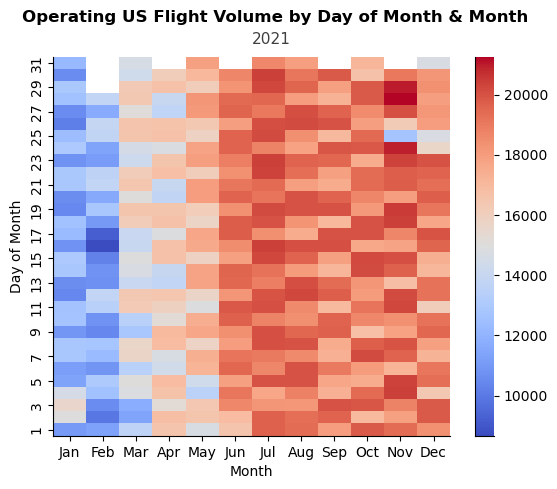

In [49]:
# 1D - heat map - operated flights volumne by month & day of month
hm1 = sns.heatmap(df_operated_mdm, 
                      cmap='coolwarm', 
                      xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                      yticklabels='auto'
                      )
hm1.invert_yaxis()
hm1.set_title("Operating US Flight Volume by Day of Month & Month", pad=25, fontweight='bold', fontsize=12, x=0.56)
hm1.text(x=6, y=32, s='2021', fontsize=11, alpha=0.75)
sns.despine()
plt.subplots_adjust(top=0.9)
hm1.set_xlabel("Month")
hm1.set_ylabel("Day of Month")

[Text(0, 0.5, '1'),
 Text(0, 2.5, '3'),
 Text(0, 4.5, '5'),
 Text(0, 6.5, '7'),
 Text(0, 8.5, '9'),
 Text(0, 10.5, '11'),
 Text(0, 12.5, '13'),
 Text(0, 14.5, '15'),
 Text(0, 16.5, '17'),
 Text(0, 18.5, '19'),
 Text(0, 20.5, '21'),
 Text(0, 22.5, '23'),
 Text(0, 24.5, '25'),
 Text(0, 26.5, '27'),
 Text(0, 28.5, '29'),
 Text(0, 30.5, '31')]

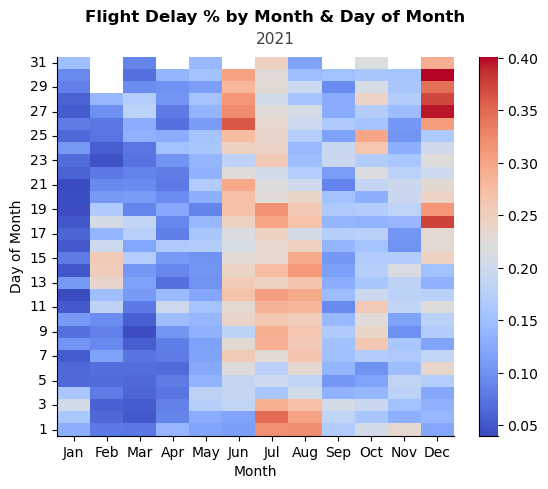

In [50]:
#2E_01 - Flight Delay % by Month & Day of Month
heatmap = sns.heatmap(df_delay_pct_mdm, 
                      cmap='coolwarm', 
                      xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                      yticklabels='auto'
                      )

heatmap.invert_yaxis()
heatmap.set_title("Flight Delay % by Month & Day of Month", pad=25, fontweight='bold', fontsize=12, x=0.55)
heatmap.text(x=6, y=32, s='2021', fontsize=11, alpha=0.75)
sns.despine()
plt.subplots_adjust(top=0.9)
heatmap.set_xlabel("Month")
heatmap.set_ylabel("Day of Month")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0)


[Text(0, 0.5, 'Mon'),
 Text(0, 1.5, 'Tues'),
 Text(0, 2.5, 'Wed'),
 Text(0, 3.5, 'Thurs'),
 Text(0, 4.5, 'Fri'),
 Text(0, 5.5, 'Sat'),
 Text(0, 6.5, 'Sun')]

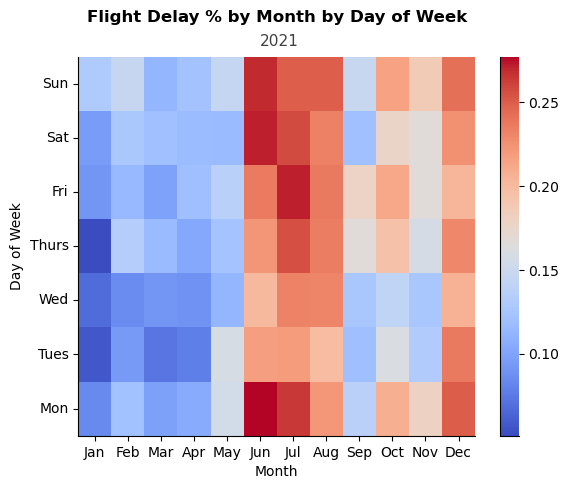

In [51]:
#2E_02 - Flight Delay % by Month by Day of Week

heatmap = sns.heatmap(df_delay_pct_mdw,
                      cmap='coolwarm',
                      xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                      yticklabels=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
                      )
heatmap.invert_yaxis()
heatmap.set_title("Flight Delay % by Month by Day of Week", pad=25, fontweight='bold', fontsize=12)
heatmap.set_xlabel("Month")
heatmap.set_ylabel("Day of Week")
heatmap.text(x=5.5, y=7.2, s='2021', fontsize=11, alpha=0.75)
plt.subplots_adjust(top=0.9)
sns.despine()
plt.subplots_adjust(top=0.9)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0)

[Text(0, 0.5, '0001'),
 Text(0, 1.5, '0600'),
 Text(0, 2.5, '0700'),
 Text(0, 3.5, '0800'),
 Text(0, 4.5, '0900'),
 Text(0, 5.5, '1000'),
 Text(0, 6.5, '1100'),
 Text(0, 7.5, '1200'),
 Text(0, 8.5, '1300'),
 Text(0, 9.5, '1400'),
 Text(0, 10.5, '1500'),
 Text(0, 11.5, '1600'),
 Text(0, 12.5, '1700'),
 Text(0, 13.5, '1800'),
 Text(0, 14.5, '1900'),
 Text(0, 15.5, '2000'),
 Text(0, 16.5, '2100'),
 Text(0, 17.5, '2200'),
 Text(0, 18.5, '2300')]

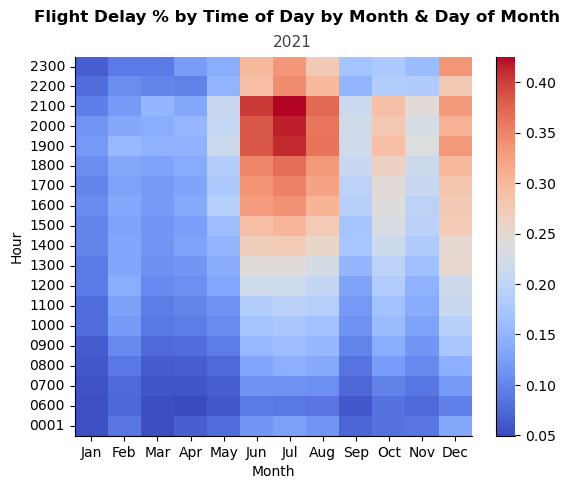

In [52]:
#2E_03 - Flight Delay % by Time of Day by Month & Day of Month
hm3 = sns.heatmap(df_delayed_by_time_block, 
                      cmap='coolwarm', 
                      xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                      yticklabels='auto'
                      )
hm3.invert_yaxis()
hm3.set_title("Flight Delay % by Time of Day by Month & Day of Month", pad=25, fontweight='bold', fontsize=12, x=0.56)
hm3.text(x=6, y=19.5, s='2021', fontsize=11, alpha=0.75)
sns.despine()
plt.subplots_adjust(top=0.9)
hm3.set_xlabel("Month")
hm3.set_ylabel("Hour")
#hm3.set_yticks(['00'])
hm3.yaxis.set_ticklabels(hm3.yaxis.get_ticklabels(), rotation=0)

In [53]:
dep15 = df.groupby(['Month','DayOfWeek'])['DepDel15'].sum().unstack(level=0)
dep15

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
1,"4,379.00","5,856.00","7,486.00","6,922.00","13,539.00","21,499.00","21,294.00","21,776.00","10,640.00","16,279.00","18,033.00","19,113.00"
2,"2,419.00","3,772.00","4,844.00","4,330.00","9,486.00","19,423.00","16,650.00","17,994.00","8,306.00","11,555.00","12,165.00","16,987.00"
3,"2,905.00","3,555.00","6,240.00","5,020.00","7,057.00","18,380.00","17,980.00","17,246.00","11,332.00","10,395.00","9,714.00","18,908.00"
4,"2,604.00","6,797.00","7,398.00","8,596.00","8,758.00","17,383.00","25,771.00","18,952.00","16,569.00","15,462.00","11,595.00","22,383.00"
5,"5,695.00","6,172.00","6,345.00","9,958.00","9,740.00","18,541.00","27,426.00","19,032.00","14,261.00","21,039.00","12,917.00","18,183.00"
6,"5,490.00","5,710.00","6,931.00","7,057.00","9,112.00","19,735.00","23,999.00","17,003.00","8,247.00","15,148.00","12,053.00","14,678.00"
7,"8,547.00","7,418.00","7,113.00","8,083.00","12,574.00","21,039.00","19,446.00","24,447.00","11,415.00","20,665.00","15,003.00","18,298.00"


In [54]:
dep15_dom = df.groupby(['Month','DayofMonth'])['DepDel15'].sum().unstack(level=0)
dep15_dom

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayofMonth,,,,,,,,,,,,
1,"1,456.00",901.00,"1,052.00","2,324.00","1,737.00","1,874.00","6,330.00","6,250.00","3,080.00","4,081.00","4,509.00","2,240.00"
2,"2,427.00",636.00,575.00,"1,498.00","2,098.00","2,013.00","6,861.00","5,843.00","3,625.00","2,723.00","2,328.00","2,794.00"
3,"3,177.00",616.00,625.00,"1,314.00","2,851.00","3,502.00","5,307.00","4,916.00","4,143.00","3,866.00","2,854.00","2,647.00"
4,"2,316.00","1,019.00",913.00,"1,238.00","2,465.00","3,650.00","2,835.00","3,858.00","2,335.00","2,746.00","3,689.00","2,013.00"
5,745.00,873.00,978.00,"1,366.00","1,938.00","3,403.00","4,004.00","3,688.00","1,872.00","2,083.00","3,796.00","3,326.00"
6,720.00,751.00,927.00,952.00,"2,135.00","4,350.00","3,332.00","4,646.00","2,630.00","1,806.00","2,545.00","4,550.00"
7,690.00,"1,443.00","1,164.00","1,191.00","2,042.00","4,973.00","4,372.00","4,974.00","2,615.00","3,449.00","3,232.00","3,249.00"
8,"1,335.00","1,189.00",867.00,"1,406.00","1,825.00","4,153.00","5,821.00","5,200.00","2,663.00","5,162.00","3,219.00","2,130.00"
9,763.00,883.00,536.00,"1,772.00","2,358.00","3,344.00","5,858.00","5,187.00","3,286.00","4,025.00","1,754.00","3,322.00"


### Destinations Airports

In [57]:
cancelled = df['Cancelled'] == False
scheduled = df['Cancelled'] == True

In [69]:
# Top 20 Airports
dest_airport = df[scheduled].groupby('Dest')['FlightDate'].count().sort_values(ascending=False).head(20)
dest_airport.head()

Dest
DFW    9225
ORD    6231
DEN    6058
IAH    3618
EWR    3288
Name: FlightDate, dtype: int64

In [70]:
# Top 20 Airports with cancelled flights
cancelled_airports = df[cancelled].groupby('Dest')['FlightDate'].count().sort_values(ascending=False).head(10)
cancelled_airports.head()

Dest
ATL    311162
ORD    279335
DFW    271117
DEN    262045
CLT    223346
Name: FlightDate, dtype: int64

### Airlines

In [75]:
#grouped = df.groupby(['Airline','Origin'])['Cancelled'].sum()
grouped = df.groupby(['Marketing_Airline_Network'])['Cancelled'].sum()
cancelled = grouped.sort_values(ascending=False)
cancelled
#sns.barplot(y='Airline', data=cancelled)

Marketing_Airline_Network
AA    33452
UA    25203
WN    23505
DL     7866
AS     6010
NK     5661
G4     3829
B6     3299
F9     1929
HA      264
Name: Cancelled, dtype: int64

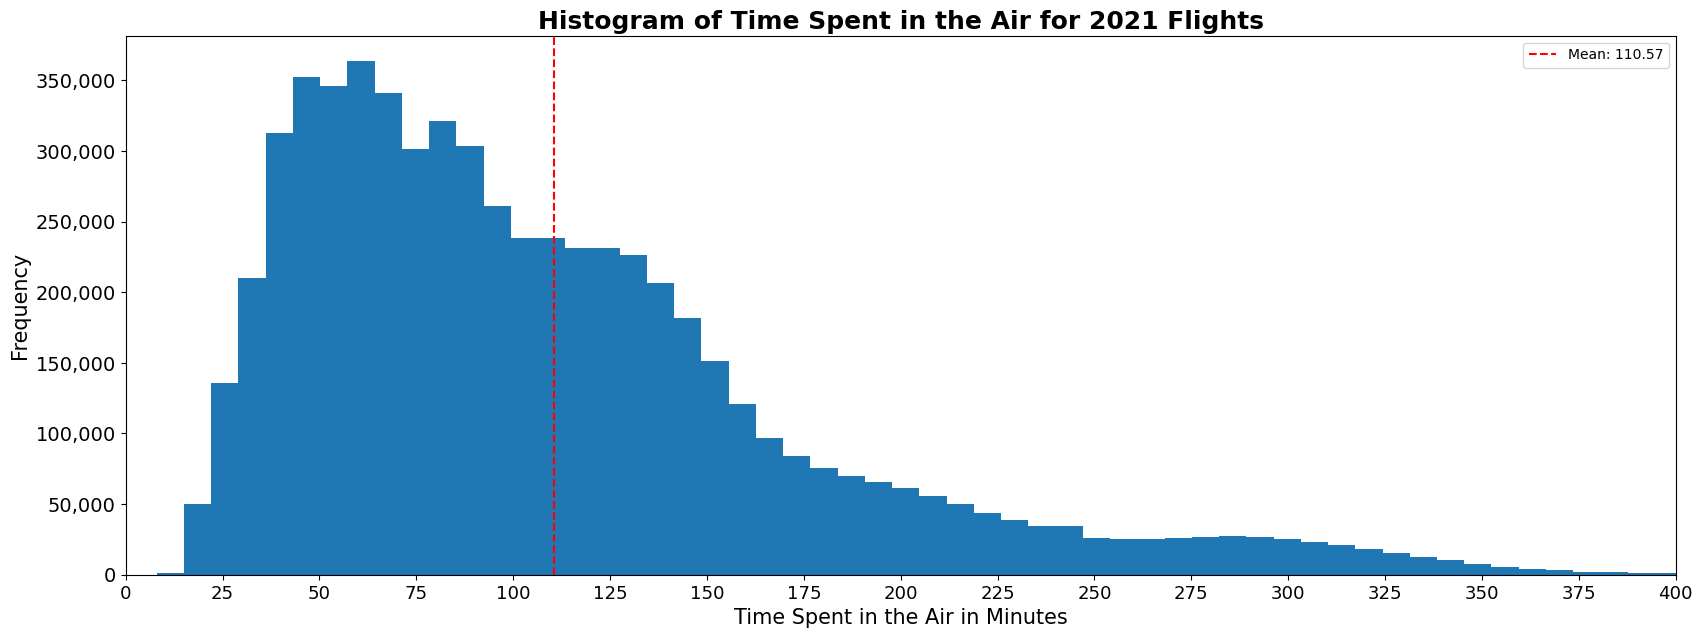

In [77]:
import matplotlib.ticker as mtick
fig1, ax1 = plt.subplots(figsize = (20,7))
plt.hist(sub_2021_df.AirTime, bins=100)
plt.axvline(sub_2021_df.AirTime.mean(), color = 'r', linestyle = '--', label = f'Mean: {sub_2021_df.AirTime.mean():.2f}')
plt.legend()
plt.xlim(0,400)
plt.xticks(range(0,401,25), size='13')
plt.yticks(size='14')
plt.title('Histogram of Time Spent in the Air for 2021 Flights',pad=5, fontweight='bold', fontsize=18)
plt.xlabel('Time Spent in the Air in Minutes', size='15')
plt.ylabel('Frequency', size='15')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

In [81]:
states_by_dep = pd.DataFrame(sub_2021_df[sub_2021_df['Cancelled']==False])
states_by_dep = pd.DataFrame(sub_2021_df['OriginState'].value_counts())
states_by_dep.head()

,OriginState
TX,699255
CA,592112
FL,568815
IL,366479
GA,341017


In [79]:
fig = px.choropleth(states_by_dep, 
                    locations=states_by_dep.index,  # set the locations to be the index (state abbreviations)
                    locationmode='USA-states', 
                    color='OriginState', 
                    scope='usa', 
                    color_continuous_scale='YlOrRd', 
                    title='Airports with Delays by State',
                    range_color=(0, 700000),  # adjust the range of the color scale based on the maximum value in your data
                    color_continuous_midpoint=350000,  # set the midpoint of the color scale to a value in the middle of your range
                    labels={'OriginState': 'Number of Departures'})  # set the label for the color scale

fig.update_layout(
    title={
        'text': "Map of US States by # of Departures in 2021",
        'y':0.8,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=800,
    height=500)
fig.show()